# 1. Load Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt



In [2]:
figure_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
print(figure_folder)
if not os.path.exists(figure_folder):
    os.makedirs(figure_folder)
    
    
sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=150, dpi_save=300, frameon=False, 
                              figsize=(4, 4), fontsize=8, facecolor='white', transparent=True)
sc.settings.figdir = figure_folder

L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear


# 2. Load labled RNA MERFISH data and add class labels

**manual_labeled_data** can be generated by the jupyter notebook from the path below:

[2_rna_merfish_celltype_labeling_and_prediction](2_rna_merfish_celltype_labeling_and_prediction.ipynb)

In [3]:
save_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
merged_adata = sc.read(os.path.join(save_folder,'manual_labeled_data.h5ad'))

In [6]:
adata_ori = merged_adata.raw.to_adata()
adata_ori

AnnData object with n_obs × n_vars = 62732 × 242
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'experiment', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_subclass', 'subclass_prediction_label', 'leiden_subclass_sub', 'subclass_manual_label', 'subclass_manual_label_predict'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'experiment_colors', 'leiden', 'leiden_colors', 'leiden_subclass_colors', 'leiden_subclass_sub_colors', 'neighbors', 'pca', 'scrublet', 'subclass_manual_label_colors', 'subclass_prediction_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

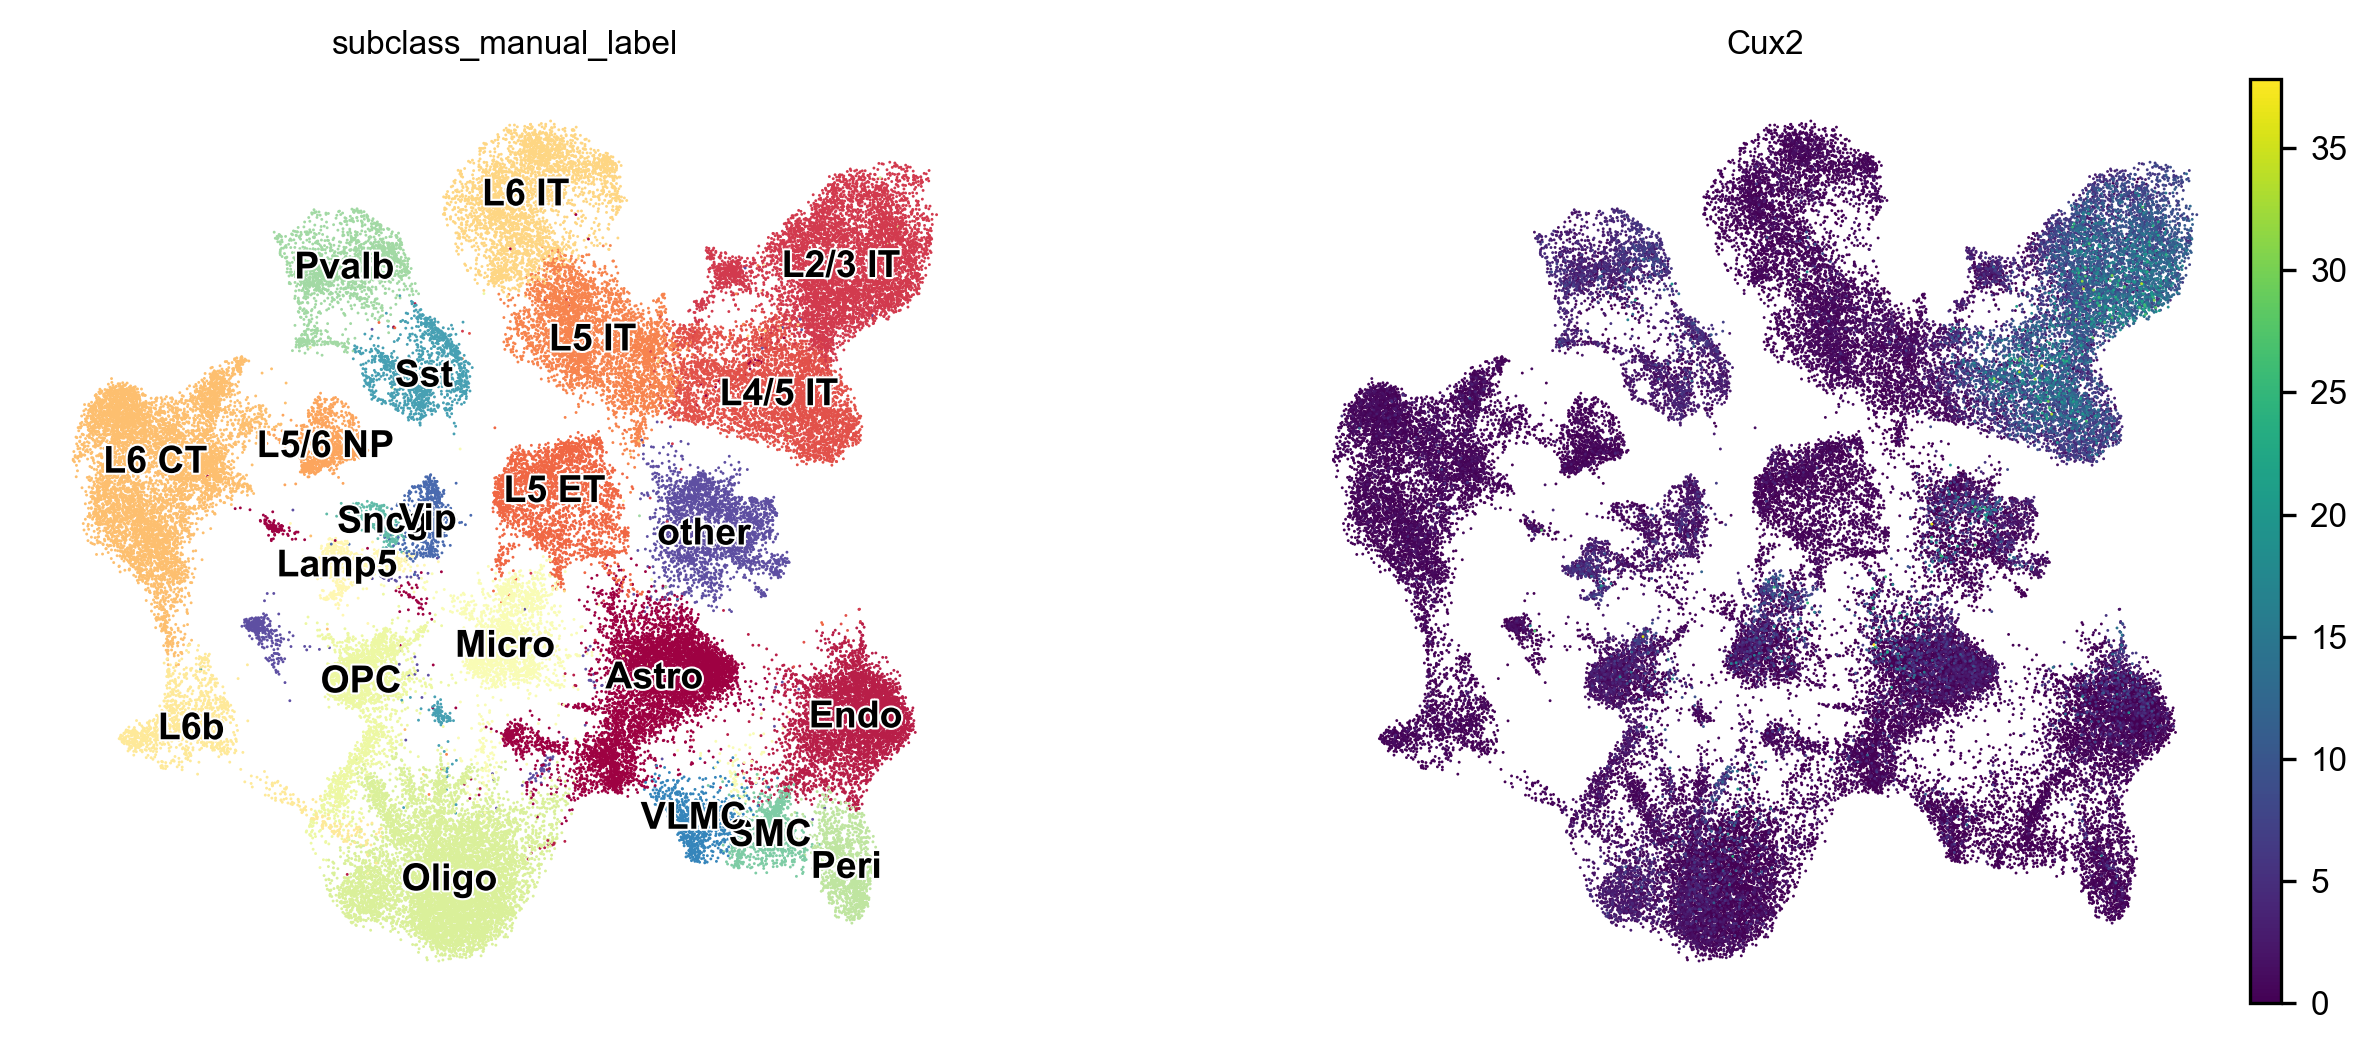

In [10]:
sc.pl.umap(adata_ori, color=['subclass_manual_label', 'Cux2'], legend_loc='on data',legend_fontsize=9,legend_fontoutline=1)

## 2.1 Duplicate the manual label col as 'subclass_label_new' for omic data consistency

In [22]:
merged_adata.obs['subclass_label_new']  = merged_adata.obs['subclass_manual_label'] 

np.unique(merged_adata.obs['subclass_label_new'] )

array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'Peri',
       'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip', 'other'],
      dtype=object)

## 2.2 Merge some 'subclass_label_new' to 'class_label_new'

In [23]:
new_class_dict = {}

for _class in ['L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP','L6 CT', 'L6 IT', 'L6b']:
    new_class_dict[_class]='Gluta'
    
for _class in ['Lamp5','Pvalb', 'Sncg', 'Sst', 'Vip']:
    new_class_dict[_class]='GABA'
    
for _class in ['OPC','Oligo']:
    new_class_dict[_class]='Oligo'
    
for _class in ['Astro']:
    new_class_dict[_class]='Astro'
    
for _class in ['Micro']:
    new_class_dict[_class]='Micro'
    
for _class in ['Endo']:
    new_class_dict[_class]='Endo'
    

# re-label subclass based on Cux2 and Rorb expression level

new_class_label_dict ={'class_label_new':new_class_dict}

# duplicate the column for manual labeling of the final classes
merged_adata.obs['class_label_new'] = merged_adata.obs['subclass_label_new'] 
merged_adata.obs = merged_adata.obs.replace(new_class_label_dict) 

np.unique(merged_adata.obs['class_label_new'] )

array(['Astro', 'Endo', 'GABA', 'Gluta', 'Micro', 'Oligo', 'Peri', 'SMC',
       'VLMC', 'other'], dtype=object)

## 2.3 Merge some 'class_label_new' to 'neuron_identity'

In [25]:
# re-label subclass based on Cux2 and Rorb expression level

new_class_dict = {}

for _class in ['Gluta','GABA']:
    new_class_dict[_class]='Neuronal'
    
for _class in ['Astro', 'Endo','Micro','Oligo', 'Peri', 'SMC',
       'VLMC',]:
    new_class_dict[_class]='Non-Neuronal'
    

new_class_label_dict ={'neuron_identity':new_class_dict}

# duplicate the column for manual labeling of the final classes
merged_adata.obs['neuron_identity'] = merged_adata.obs['class_label_new'] 
merged_adata.obs = merged_adata.obs.replace(new_class_label_dict)

np.unique(merged_adata.obs['neuron_identity'] )

array(['Neuronal', 'Non-Neuronal', 'other'], dtype=object)

# 3. Show celltypes

by comparing two UMAP above, we could estimate which cluster should be further splitted

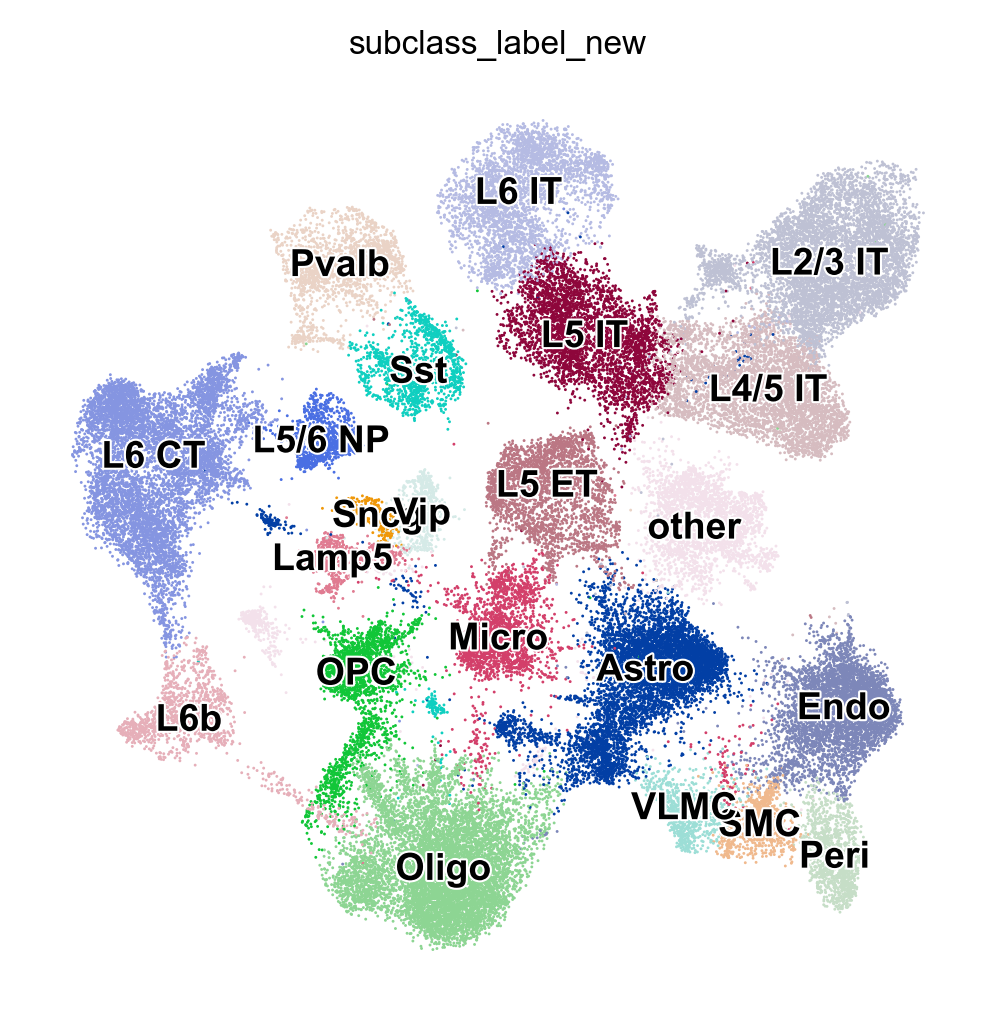

In [27]:
sc.pl.umap(merged_adata, color=['subclass_label_new'], legend_loc='on data',legend_fontsize=9,legend_fontoutline=1)

# 4. Save newly labeled data

In [37]:
save_filename = os.path.join(os.path.join(save_folder, 'new_labeled_data.h5ad'))

overwrite = True

if not os.path.exists(save_filename) or overwrite:
    print(f"save merged_adata into file: {save_filename}")
    merged_adata.write(save_filename)
else:
    print(f"savefile: {save_filename} already exists")

save merged_adata into file: L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear\new_labeled_data.h5ad
